## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 51.5ms	remaining: 51.4s
1:	learn: 0.9301086	total: 55ms	remaining: 27.5s
2:	learn: 0.9005637	total: 58.2ms	remaining: 19.3s
3:	learn: 0.8720983	total: 62.4ms	remaining: 15.5s
4:	learn: 0.8467410	total: 65.9ms	remaining: 13.1s
5:	learn: 0.8226672	total: 69.4ms	remaining: 11.5s
6:	learn: 0.7994702	total: 72.9ms	remaining: 10.3s
7:	learn: 0.7784272	total: 75.9ms	remaining: 9.41s
8:	learn: 0.7602192	total: 79.2ms	remaining: 8.72s
9:	learn: 0.7412421	total: 82.5ms	remaining: 8.16s
10:	learn: 0.7247930	total: 85.6ms	remaining: 7.69s
11:	learn: 0.7089951	total: 88.3ms	remaining: 7.27s
12:	learn: 0.6951345	total: 92.3ms	remaining: 7.01s
13:	learn: 0.6809276	total: 95.7ms	remaining: 6.74s
14:	learn: 0.6692630	total: 98.4ms	remaining: 6.46s
15:	learn: 0.6588323	total: 101ms	remaining: 6.23s
16:	learn: 0.6472700	total: 105ms	remaining: 6.05s
17:	learn: 0.6379982	total: 107ms	remaining: 5.85s
18:	learn: 0.6294674	total: 110ms	remaining: 5.68

44:	learn: 0.5100547	total: 187ms	remaining: 3.98s
45:	learn: 0.5069096	total: 190ms	remaining: 3.95s
46:	learn: 0.5051685	total: 193ms	remaining: 3.92s
47:	learn: 0.5033968	total: 196ms	remaining: 3.89s
48:	learn: 0.5012433	total: 199ms	remaining: 3.85s
49:	learn: 0.4986132	total: 202ms	remaining: 3.83s
50:	learn: 0.4968022	total: 205ms	remaining: 3.81s
51:	learn: 0.4951632	total: 208ms	remaining: 3.78s
52:	learn: 0.4928924	total: 210ms	remaining: 3.76s
53:	learn: 0.4917272	total: 213ms	remaining: 3.74s
54:	learn: 0.4895079	total: 216ms	remaining: 3.71s
55:	learn: 0.4881884	total: 219ms	remaining: 3.68s
56:	learn: 0.4861566	total: 222ms	remaining: 3.67s
57:	learn: 0.4850201	total: 225ms	remaining: 3.65s
58:	learn: 0.4840055	total: 227ms	remaining: 3.63s
59:	learn: 0.4824455	total: 230ms	remaining: 3.61s
60:	learn: 0.4809744	total: 233ms	remaining: 3.59s
61:	learn: 0.4801376	total: 236ms	remaining: 3.57s
62:	learn: 0.4792422	total: 239ms	remaining: 3.55s
63:	learn: 0.4780719	total: 241

97:	learn: 0.4513919	total: 378ms	remaining: 3.48s
98:	learn: 0.4503747	total: 381ms	remaining: 3.47s
99:	learn: 0.4494783	total: 384ms	remaining: 3.46s
100:	learn: 0.4487329	total: 387ms	remaining: 3.44s
101:	learn: 0.4481325	total: 390ms	remaining: 3.43s
102:	learn: 0.4475445	total: 393ms	remaining: 3.42s
103:	learn: 0.4466014	total: 396ms	remaining: 3.41s
104:	learn: 0.4461730	total: 399ms	remaining: 3.4s
105:	learn: 0.4457259	total: 402ms	remaining: 3.39s
106:	learn: 0.4451085	total: 405ms	remaining: 3.38s
107:	learn: 0.4447909	total: 408ms	remaining: 3.37s
108:	learn: 0.4440936	total: 412ms	remaining: 3.37s
109:	learn: 0.4435519	total: 415ms	remaining: 3.36s
110:	learn: 0.4431075	total: 418ms	remaining: 3.35s
111:	learn: 0.4425498	total: 421ms	remaining: 3.34s
112:	learn: 0.4419106	total: 424ms	remaining: 3.33s
113:	learn: 0.4414425	total: 428ms	remaining: 3.32s
114:	learn: 0.4407446	total: 431ms	remaining: 3.31s
115:	learn: 0.4402011	total: 434ms	remaining: 3.31s
116:	learn: 0.43

160:	learn: 0.4201256	total: 567ms	remaining: 2.96s
161:	learn: 0.4197073	total: 570ms	remaining: 2.95s
162:	learn: 0.4192052	total: 573ms	remaining: 2.94s
163:	learn: 0.4187949	total: 576ms	remaining: 2.94s
164:	learn: 0.4184572	total: 579ms	remaining: 2.93s
165:	learn: 0.4180680	total: 582ms	remaining: 2.92s
166:	learn: 0.4176884	total: 585ms	remaining: 2.92s
167:	learn: 0.4173026	total: 587ms	remaining: 2.91s
168:	learn: 0.4170486	total: 590ms	remaining: 2.9s
169:	learn: 0.4165960	total: 593ms	remaining: 2.89s
170:	learn: 0.4161870	total: 596ms	remaining: 2.89s
171:	learn: 0.4156228	total: 598ms	remaining: 2.88s
172:	learn: 0.4153041	total: 601ms	remaining: 2.87s
173:	learn: 0.4148857	total: 605ms	remaining: 2.87s
174:	learn: 0.4144190	total: 607ms	remaining: 2.86s
175:	learn: 0.4140875	total: 610ms	remaining: 2.86s
176:	learn: 0.4136755	total: 613ms	remaining: 2.85s
177:	learn: 0.4133860	total: 616ms	remaining: 2.85s
178:	learn: 0.4129780	total: 619ms	remaining: 2.84s
179:	learn: 0

225:	learn: 0.3971729	total: 760ms	remaining: 2.6s
226:	learn: 0.3968841	total: 762ms	remaining: 2.6s
227:	learn: 0.3965787	total: 765ms	remaining: 2.59s
228:	learn: 0.3963073	total: 767ms	remaining: 2.58s
229:	learn: 0.3960925	total: 770ms	remaining: 2.58s
230:	learn: 0.3957018	total: 773ms	remaining: 2.57s
231:	learn: 0.3954162	total: 775ms	remaining: 2.57s
232:	learn: 0.3951665	total: 778ms	remaining: 2.56s
233:	learn: 0.3949269	total: 781ms	remaining: 2.56s
234:	learn: 0.3945894	total: 784ms	remaining: 2.55s
235:	learn: 0.3944181	total: 787ms	remaining: 2.55s
236:	learn: 0.3941497	total: 790ms	remaining: 2.54s
237:	learn: 0.3939819	total: 794ms	remaining: 2.54s
238:	learn: 0.3938322	total: 797ms	remaining: 2.54s
239:	learn: 0.3935463	total: 800ms	remaining: 2.53s
240:	learn: 0.3933166	total: 803ms	remaining: 2.53s
241:	learn: 0.3930992	total: 806ms	remaining: 2.52s
242:	learn: 0.3928898	total: 809ms	remaining: 2.52s
243:	learn: 0.3926199	total: 812ms	remaining: 2.52s
244:	learn: 0.

286:	learn: 0.3824534	total: 954ms	remaining: 2.37s
287:	learn: 0.3821767	total: 958ms	remaining: 2.37s
288:	learn: 0.3819748	total: 966ms	remaining: 2.38s
289:	learn: 0.3817667	total: 969ms	remaining: 2.37s
290:	learn: 0.3815253	total: 972ms	remaining: 2.37s
291:	learn: 0.3813529	total: 975ms	remaining: 2.36s
292:	learn: 0.3812172	total: 977ms	remaining: 2.36s
293:	learn: 0.3809978	total: 981ms	remaining: 2.35s
294:	learn: 0.3807825	total: 984ms	remaining: 2.35s
295:	learn: 0.3805940	total: 987ms	remaining: 2.35s
296:	learn: 0.3801959	total: 991ms	remaining: 2.34s
297:	learn: 0.3799439	total: 993ms	remaining: 2.34s
298:	learn: 0.3797228	total: 996ms	remaining: 2.33s
299:	learn: 0.3795554	total: 999ms	remaining: 2.33s
300:	learn: 0.3793733	total: 1s	remaining: 2.33s
301:	learn: 0.3791607	total: 1s	remaining: 2.32s
302:	learn: 0.3789297	total: 1.01s	remaining: 2.32s
303:	learn: 0.3787482	total: 1.01s	remaining: 2.31s
304:	learn: 0.3786528	total: 1.01s	remaining: 2.31s
305:	learn: 0.3784

344:	learn: 0.3711642	total: 1.15s	remaining: 2.18s
345:	learn: 0.3709569	total: 1.15s	remaining: 2.17s
346:	learn: 0.3708184	total: 1.15s	remaining: 2.17s
347:	learn: 0.3705958	total: 1.16s	remaining: 2.17s
348:	learn: 0.3703798	total: 1.17s	remaining: 2.18s
349:	learn: 0.3701923	total: 1.17s	remaining: 2.17s
350:	learn: 0.3700067	total: 1.17s	remaining: 2.17s
351:	learn: 0.3698930	total: 1.18s	remaining: 2.17s
352:	learn: 0.3697314	total: 1.18s	remaining: 2.16s
353:	learn: 0.3695617	total: 1.18s	remaining: 2.16s
354:	learn: 0.3694397	total: 1.18s	remaining: 2.15s
355:	learn: 0.3692589	total: 1.19s	remaining: 2.15s
356:	learn: 0.3691107	total: 1.19s	remaining: 2.15s
357:	learn: 0.3689645	total: 1.19s	remaining: 2.14s
358:	learn: 0.3687886	total: 1.2s	remaining: 2.14s
359:	learn: 0.3686485	total: 1.2s	remaining: 2.13s
360:	learn: 0.3685749	total: 1.2s	remaining: 2.13s
361:	learn: 0.3683909	total: 1.21s	remaining: 2.13s
362:	learn: 0.3682710	total: 1.21s	remaining: 2.12s
363:	learn: 0.3

403:	learn: 0.3616747	total: 1.34s	remaining: 1.98s
404:	learn: 0.3614255	total: 1.34s	remaining: 1.97s
405:	learn: 0.3613607	total: 1.34s	remaining: 1.97s
406:	learn: 0.3612875	total: 1.35s	remaining: 1.96s
407:	learn: 0.3611516	total: 1.35s	remaining: 1.96s
408:	learn: 0.3609621	total: 1.35s	remaining: 1.95s
409:	learn: 0.3608193	total: 1.35s	remaining: 1.95s
410:	learn: 0.3604920	total: 1.36s	remaining: 1.95s
411:	learn: 0.3603038	total: 1.36s	remaining: 1.94s
412:	learn: 0.3602055	total: 1.36s	remaining: 1.94s
413:	learn: 0.3599094	total: 1.37s	remaining: 1.94s
414:	learn: 0.3597887	total: 1.37s	remaining: 1.93s
415:	learn: 0.3595791	total: 1.37s	remaining: 1.93s
416:	learn: 0.3594487	total: 1.38s	remaining: 1.92s
417:	learn: 0.3592759	total: 1.38s	remaining: 1.92s
418:	learn: 0.3591088	total: 1.38s	remaining: 1.92s
419:	learn: 0.3589470	total: 1.38s	remaining: 1.91s
420:	learn: 0.3587972	total: 1.39s	remaining: 1.91s
421:	learn: 0.3586831	total: 1.39s	remaining: 1.9s
422:	learn: 0

466:	learn: 0.3525102	total: 1.53s	remaining: 1.75s
467:	learn: 0.3523547	total: 1.53s	remaining: 1.74s
468:	learn: 0.3522115	total: 1.53s	remaining: 1.74s
469:	learn: 0.3521029	total: 1.54s	remaining: 1.73s
470:	learn: 0.3519673	total: 1.54s	remaining: 1.73s
471:	learn: 0.3518082	total: 1.54s	remaining: 1.73s
472:	learn: 0.3516593	total: 1.56s	remaining: 1.73s
473:	learn: 0.3514906	total: 1.56s	remaining: 1.73s
474:	learn: 0.3513843	total: 1.56s	remaining: 1.73s
475:	learn: 0.3512406	total: 1.57s	remaining: 1.73s
476:	learn: 0.3510044	total: 1.57s	remaining: 1.72s
477:	learn: 0.3509121	total: 1.57s	remaining: 1.72s
478:	learn: 0.3507270	total: 1.58s	remaining: 1.71s
479:	learn: 0.3506003	total: 1.58s	remaining: 1.71s
480:	learn: 0.3505111	total: 1.58s	remaining: 1.71s
481:	learn: 0.3503906	total: 1.58s	remaining: 1.7s
482:	learn: 0.3501522	total: 1.59s	remaining: 1.7s
483:	learn: 0.3500494	total: 1.59s	remaining: 1.7s
484:	learn: 0.3498921	total: 1.59s	remaining: 1.69s
485:	learn: 0.3

526:	learn: 0.3444940	total: 1.72s	remaining: 1.54s
527:	learn: 0.3443508	total: 1.72s	remaining: 1.54s
528:	learn: 0.3442153	total: 1.73s	remaining: 1.54s
529:	learn: 0.3441108	total: 1.73s	remaining: 1.53s
530:	learn: 0.3439546	total: 1.73s	remaining: 1.53s
531:	learn: 0.3438254	total: 1.74s	remaining: 1.53s
532:	learn: 0.3437049	total: 1.74s	remaining: 1.52s
533:	learn: 0.3435053	total: 1.74s	remaining: 1.52s
534:	learn: 0.3433236	total: 1.74s	remaining: 1.52s
535:	learn: 0.3432219	total: 1.75s	remaining: 1.51s
536:	learn: 0.3431615	total: 1.75s	remaining: 1.51s
537:	learn: 0.3430198	total: 1.75s	remaining: 1.51s
538:	learn: 0.3429422	total: 1.76s	remaining: 1.5s
539:	learn: 0.3428024	total: 1.76s	remaining: 1.5s
540:	learn: 0.3426641	total: 1.76s	remaining: 1.5s
541:	learn: 0.3425885	total: 1.77s	remaining: 1.49s
542:	learn: 0.3424695	total: 1.77s	remaining: 1.49s
543:	learn: 0.3423997	total: 1.77s	remaining: 1.49s
544:	learn: 0.3422315	total: 1.78s	remaining: 1.48s
545:	learn: 0.3

583:	learn: 0.3379690	total: 1.92s	remaining: 1.36s
584:	learn: 0.3378924	total: 1.92s	remaining: 1.36s
585:	learn: 0.3378307	total: 1.92s	remaining: 1.36s
586:	learn: 0.3377186	total: 1.93s	remaining: 1.35s
587:	learn: 0.3376434	total: 1.93s	remaining: 1.35s
588:	learn: 0.3375696	total: 1.93s	remaining: 1.35s
589:	learn: 0.3374902	total: 1.94s	remaining: 1.34s
590:	learn: 0.3373056	total: 1.94s	remaining: 1.34s
591:	learn: 0.3371913	total: 1.94s	remaining: 1.34s
592:	learn: 0.3371272	total: 1.94s	remaining: 1.33s
593:	learn: 0.3370368	total: 1.95s	remaining: 1.33s
594:	learn: 0.3368150	total: 1.95s	remaining: 1.33s
595:	learn: 0.3367491	total: 1.95s	remaining: 1.32s
596:	learn: 0.3366496	total: 1.96s	remaining: 1.32s
597:	learn: 0.3365561	total: 1.96s	remaining: 1.32s
598:	learn: 0.3364801	total: 1.96s	remaining: 1.31s
599:	learn: 0.3363937	total: 1.96s	remaining: 1.31s
600:	learn: 0.3363054	total: 1.97s	remaining: 1.3s
601:	learn: 0.3361892	total: 1.97s	remaining: 1.3s
602:	learn: 0.

647:	learn: 0.3315220	total: 2.11s	remaining: 1.15s
648:	learn: 0.3313829	total: 2.11s	remaining: 1.14s
649:	learn: 0.3313125	total: 2.11s	remaining: 1.14s
650:	learn: 0.3311735	total: 2.12s	remaining: 1.14s
651:	learn: 0.3310386	total: 2.12s	remaining: 1.13s
652:	learn: 0.3309129	total: 2.12s	remaining: 1.13s
653:	learn: 0.3308321	total: 2.13s	remaining: 1.12s
654:	learn: 0.3307342	total: 2.13s	remaining: 1.12s
655:	learn: 0.3306809	total: 2.13s	remaining: 1.12s
656:	learn: 0.3305729	total: 2.13s	remaining: 1.11s
657:	learn: 0.3304900	total: 2.14s	remaining: 1.11s
658:	learn: 0.3303842	total: 2.14s	remaining: 1.11s
659:	learn: 0.3302235	total: 2.14s	remaining: 1.1s
660:	learn: 0.3300983	total: 2.15s	remaining: 1.1s
661:	learn: 0.3299994	total: 2.15s	remaining: 1.1s
662:	learn: 0.3299184	total: 2.15s	remaining: 1.09s
663:	learn: 0.3298189	total: 2.15s	remaining: 1.09s
664:	learn: 0.3296970	total: 2.16s	remaining: 1.09s
665:	learn: 0.3296671	total: 2.16s	remaining: 1.08s
666:	learn: 0.3

712:	learn: 0.3253361	total: 2.3s	remaining: 926ms
713:	learn: 0.3252431	total: 2.3s	remaining: 922ms
714:	learn: 0.3251186	total: 2.31s	remaining: 919ms
715:	learn: 0.3250323	total: 2.31s	remaining: 915ms
716:	learn: 0.3249511	total: 2.31s	remaining: 912ms
717:	learn: 0.3248372	total: 2.31s	remaining: 909ms
718:	learn: 0.3247371	total: 2.32s	remaining: 905ms
719:	learn: 0.3246676	total: 2.32s	remaining: 902ms
720:	learn: 0.3245862	total: 2.32s	remaining: 899ms
721:	learn: 0.3245270	total: 2.33s	remaining: 895ms
722:	learn: 0.3244558	total: 2.33s	remaining: 892ms
723:	learn: 0.3243835	total: 2.33s	remaining: 888ms
724:	learn: 0.3242957	total: 2.33s	remaining: 885ms
725:	learn: 0.3242628	total: 2.33s	remaining: 882ms
726:	learn: 0.3242076	total: 2.34s	remaining: 878ms
727:	learn: 0.3240923	total: 2.34s	remaining: 875ms
728:	learn: 0.3240148	total: 2.35s	remaining: 872ms
729:	learn: 0.3239014	total: 2.35s	remaining: 868ms
730:	learn: 0.3237918	total: 2.35s	remaining: 865ms
731:	learn: 0.

771:	learn: 0.3200935	total: 2.49s	remaining: 737ms
772:	learn: 0.3200251	total: 2.5s	remaining: 733ms
773:	learn: 0.3199577	total: 2.5s	remaining: 730ms
774:	learn: 0.3198837	total: 2.5s	remaining: 726ms
775:	learn: 0.3198135	total: 2.5s	remaining: 723ms
776:	learn: 0.3197430	total: 2.51s	remaining: 720ms
777:	learn: 0.3196478	total: 2.51s	remaining: 717ms
778:	learn: 0.3194714	total: 2.52s	remaining: 714ms
779:	learn: 0.3194042	total: 2.52s	remaining: 710ms
780:	learn: 0.3193209	total: 2.52s	remaining: 707ms
781:	learn: 0.3192009	total: 2.52s	remaining: 703ms
782:	learn: 0.3191109	total: 2.52s	remaining: 700ms
783:	learn: 0.3190255	total: 2.53s	remaining: 697ms
784:	learn: 0.3189403	total: 2.53s	remaining: 693ms
785:	learn: 0.3188715	total: 2.53s	remaining: 690ms
786:	learn: 0.3188016	total: 2.54s	remaining: 687ms
787:	learn: 0.3187670	total: 2.54s	remaining: 683ms
788:	learn: 0.3186601	total: 2.54s	remaining: 680ms
789:	learn: 0.3185886	total: 2.54s	remaining: 677ms
790:	learn: 0.31

837:	learn: 0.3147022	total: 2.69s	remaining: 519ms
838:	learn: 0.3145737	total: 2.69s	remaining: 516ms
839:	learn: 0.3144908	total: 2.69s	remaining: 513ms
840:	learn: 0.3144038	total: 2.69s	remaining: 510ms
841:	learn: 0.3143434	total: 2.7s	remaining: 506ms
842:	learn: 0.3142662	total: 2.7s	remaining: 503ms
843:	learn: 0.3141532	total: 2.7s	remaining: 500ms
844:	learn: 0.3140919	total: 2.71s	remaining: 497ms
845:	learn: 0.3140384	total: 2.71s	remaining: 493ms
846:	learn: 0.3139822	total: 2.71s	remaining: 490ms
847:	learn: 0.3138839	total: 2.72s	remaining: 487ms
848:	learn: 0.3138291	total: 2.72s	remaining: 484ms
849:	learn: 0.3137772	total: 2.72s	remaining: 480ms
850:	learn: 0.3137138	total: 2.73s	remaining: 477ms
851:	learn: 0.3136859	total: 2.73s	remaining: 474ms
852:	learn: 0.3136054	total: 2.73s	remaining: 471ms
853:	learn: 0.3135239	total: 2.73s	remaining: 467ms
854:	learn: 0.3134711	total: 2.74s	remaining: 464ms
855:	learn: 0.3134242	total: 2.74s	remaining: 461ms
856:	learn: 0.3

902:	learn: 0.3098989	total: 2.88s	remaining: 309ms
903:	learn: 0.3098084	total: 2.88s	remaining: 306ms
904:	learn: 0.3097402	total: 2.88s	remaining: 303ms
905:	learn: 0.3096378	total: 2.88s	remaining: 299ms
906:	learn: 0.3095878	total: 2.89s	remaining: 296ms
907:	learn: 0.3095154	total: 2.89s	remaining: 293ms
908:	learn: 0.3094688	total: 2.89s	remaining: 290ms
909:	learn: 0.3093784	total: 2.9s	remaining: 286ms
910:	learn: 0.3093058	total: 2.9s	remaining: 283ms
911:	learn: 0.3092574	total: 2.9s	remaining: 280ms
912:	learn: 0.3092023	total: 2.91s	remaining: 277ms
913:	learn: 0.3091306	total: 2.91s	remaining: 274ms
914:	learn: 0.3090719	total: 2.91s	remaining: 271ms
915:	learn: 0.3090199	total: 2.92s	remaining: 267ms
916:	learn: 0.3089417	total: 2.92s	remaining: 264ms
917:	learn: 0.3088562	total: 2.92s	remaining: 261ms
918:	learn: 0.3087578	total: 2.92s	remaining: 258ms
919:	learn: 0.3086793	total: 2.93s	remaining: 255ms
920:	learn: 0.3086255	total: 2.93s	remaining: 251ms
921:	learn: 0.3

965:	learn: 0.3051873	total: 3.07s	remaining: 108ms
966:	learn: 0.3051018	total: 3.07s	remaining: 105ms
967:	learn: 0.3050172	total: 3.08s	remaining: 102ms
968:	learn: 0.3049470	total: 3.08s	remaining: 98.5ms
969:	learn: 0.3049028	total: 3.08s	remaining: 95.3ms
970:	learn: 0.3048446	total: 3.08s	remaining: 92.2ms
971:	learn: 0.3047712	total: 3.09s	remaining: 89ms
972:	learn: 0.3047313	total: 3.09s	remaining: 85.9ms
973:	learn: 0.3046600	total: 3.1s	remaining: 82.7ms
974:	learn: 0.3045983	total: 3.1s	remaining: 79.5ms
975:	learn: 0.3044944	total: 3.1s	remaining: 76.3ms
976:	learn: 0.3044431	total: 3.11s	remaining: 73.1ms
977:	learn: 0.3043959	total: 3.11s	remaining: 69.9ms
978:	learn: 0.3043249	total: 3.11s	remaining: 66.8ms
979:	learn: 0.3042644	total: 3.12s	remaining: 63.6ms
980:	learn: 0.3042142	total: 3.12s	remaining: 60.4ms
981:	learn: 0.3041509	total: 3.12s	remaining: 57.2ms
982:	learn: 0.3041077	total: 3.12s	remaining: 54ms
983:	learn: 0.3040665	total: 3.13s	remaining: 50.8ms
984

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.0924007500587014


#### Sanity Checks 

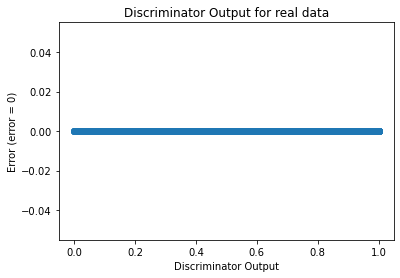

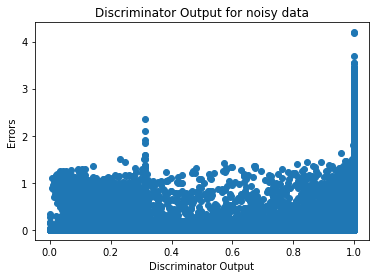

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)